In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import os
cache_path= os.path.join(os.path.dirname(os.getcwd()), 'smote_test')

In [7]:
cache_path

'/lustre/gfxhome/asislam25/projects/augment/KEEL_Data/SMOTE_Variants/smote_variants/smote_test'

In [8]:
df=pd.read_excel(os.path.join(cache_path,'All_Results_columns_improved_20Apr.xlsx'),engine='openpyxl',)

In [9]:
# !pip freeze

In [10]:
# ! conda install -y openpyxl

In [11]:
df.head()

,db_name,classifier,sampler,auc,f1,p_top20,gacc,classifier_parameters_auc,classifier_parameters_f1,classifier_parameters_p_top20,classifier_parameters_gacc,sampler_parameters_auc,sampler_parameters_f1,sampler_parameters_p_top20,sampler_parameters_gacc
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729,"{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'n_neighbors': 3, 'pop': 4, 'proportion': 2.0...","{'n_neighbors': 7, 'pop': 4, 'proportion': 2.0...","{'n_neighbors': 7, 'pop': 5, 'proportion': 2.0...","{'n_neighbors': 5, 'pop': 4, 'proportion': 1.0..."
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339,"{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'energy': 0.025, 'proportion': 2.0, 'scaling'...","{'energy': 0.0025, 'proportion': 1.0, 'scaling...","{'energy': 0.025, 'proportion': 0.5, 'scaling'...","{'energy': 0.025, 'proportion': 0.75, 'scaling..."
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443,"{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'method': 'non-linear_1.0', 'n_neighbors': 7,...","{'method': 'non-linear_1.0', 'n_neighbors': 3,...","{'method': 'non-linear_1.0', 'n_neighbors': 3,...","{'method': 'non-linear_0.1', 'n_neighbors': 5,..."
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443,"{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'dist_threshold': 0.1, 'max_dist': 0.1, 'n_ne...","{'dist_threshold': 0.9, 'max_dist': 0.8, 'n_ne...","{'dist_threshold': 0.6, 'max_dist': 0.09, 'n_n...","{'dist_threshold': 0.1, 'max_dist': 0.5, 'n_ne..."
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141,"{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'base_estimator__C': 10.0, 'base_estimator__c...","{'n_clusters': 12, 'n_neighbors': 7, 'proporti...","{'n_clusters': 12, 'n_neighbors': 7, 'proporti...","{'n_clusters': 12, 'n_neighbors': 7, 'proporti...","{'n_clusters': 12, 'n_neighbors': 7, 'proporti..."


In [12]:
cols=df.columns
df=df[cols[:7]]

In [13]:
df.head()

,db_name,classifier,sampler,auc,f1,p_top20,gacc
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141


In [14]:
samplers=df["sampler"].unique()
count_samplers=len(samplers)
print("Number of samplers:",count_samplers,"\n",samplers)

Number of samplers: 13 
 ['Assembled_SMOTE' 'CCR' 'G_SMOTE' 'KNNOR_SMOTE' 'LVQ_SMOTE' 'Lee'
 'NoSMOTE' 'ProWSyn' 'SMOBD' 'SMOTE' 'SMOTE_IPF' 'SMOTE_TomekLinks'
 'polynom_fit_SMOTE']


In [15]:
classifiers=df["classifier"].unique()
count_classifiers=len(classifiers)
print("Number of classifiers:",count_classifiers,"\n",classifiers)

Number of classifiers: 4 
 ['CalibratedClassifierCV' 'DecisionTreeClassifier' 'KNeighborsClassifier'
 'MLPClassifierWrapper']


In [16]:
db_names=df["db_name"].unique()
count_db_names=len(db_names)
print("Number of db_names:",count_db_names,"\n",db_names)

Number of db_names: 19 
 ['glass1' 'wisconsin' 'pima' 'glass0' 'yeast1' 'habarman'
 'glass-0-1-2-3_vs_4-5-6' 'SPECT_F' 'new_thyroid1' 'ecoli3'
 'ecoli-0-3-4_vs_5' 'glass-0-1-6_vs_2' 'ecoli-0-1-4-7_vs_2-3-5-6'
 'cleveland-0_vs_4' 'glass4' 'page-blocks-1-3_vs_4' 'zoo-3'
 'yeast-1-4-5-8_vs_7' 'glass5']


In [17]:
metrics=list(df.columns[-4:])
count_metrics=len(metrics)
print("Number of metrics:",count_metrics,"\n",metrics)

Number of metrics: 4 
 ['auc', 'f1', 'p_top20', 'gacc']


In [18]:
df.head()

,db_name,classifier,sampler,auc,f1,p_top20,gacc
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141


In [19]:
'''
samplers
classifiers
db_names
metrics
'''

'\nsamplers\nclassifiers\ndb_names\nmetrics\n'

In [20]:
for metric in metrics:
#     df[metric+"_rank"]=[0 for i in range(df.shape[0])]
    df[metric+"_rank"]=df.groupby(['db_name','classifier'])[metric].rank(ascending=False,method="min")

In [21]:
df.head()

,db_name,classifier,sampler,auc,f1,p_top20,gacc,auc_rank,f1_rank,p_top20_rank,gacc_rank
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729,10.0,10.0,2.0,9.0
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339,12.0,11.0,12.0,12.0
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443,2.0,6.0,2.0,2.0
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443,1.0,2.0,1.0,2.0
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141,11.0,12.0,6.0,11.0


In [22]:
df.to_excel(os.path.join(cache_path,'All_Results_columns_improved_20Apr_Ranked.xlsx'),engine='openpyxl',index=False)

# df=pd.read_excel(os.path.join(cache_path,'All_Results_columns_improved_20Apr.xlsx'),engine='openpyxl',)

In [23]:
# Target output
'''

{
"knnor_smote":{
    "CalibratedClassifierCV":{
        "auc":{
            1:4,
            2:3,
            3:6,
            ...
        
            }
        "f1":{
            1:4,
            2:3,
            3:6,
            ...
        
            }
            ...
    
        }
        "DecisionTreeClassifier":{
        ...
        }

    }
"SMOTE_IPF""{

    }


}


'''

'\n\n{\n"knnor_smote":{\n    "CalibratedClassifierCV":{\n        "auc":{\n            1:4,\n            2:3,\n            3:6,\n            ...\n        \n            }\n        "f1":{\n            1:4,\n            2:3,\n            3:6,\n            ...\n        \n            }\n            ...\n    \n        }\n        "DecisionTreeClassifier":{\n        ...\n        }\n\n    }\n"SMOTE_IPF""{\n\n    }\n\n\n}\n\n\n'

In [24]:
df.head()

,db_name,classifier,sampler,auc,f1,p_top20,gacc,auc_rank,f1_rank,p_top20_rank,gacc_rank
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729,10.0,10.0,2.0,9.0
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339,12.0,11.0,12.0,12.0
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443,2.0,6.0,2.0,2.0
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443,1.0,2.0,1.0,2.0
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141,11.0,12.0,6.0,11.0


In [25]:
great_dict={}
for sampler in samplers:
    if sampler not in great_dict:
        great_dict[sampler]={}

    for classifier in classifiers:
        if classifier not in great_dict[sampler]:
            great_dict[sampler][classifier]={}
        for metric in metrics:
            if metric not in great_dict[sampler][classifier]:
                great_dict[sampler][classifier][metric]={}
            # create fillers for rank counts
            for i in range(1,len(samplers)+1):
                if i not in great_dict[sampler][classifier][metric]:
                    great_dict[sampler][classifier][metric][i]=0
                newdf = df[(df["sampler"] == sampler) & (df["classifier"] == classifier)]
            for index,row in newdf.iterrows():
                rank=int(row[metric+"_rank"])
                great_dict[sampler][classifier][metric][rank]+=1

                
            
            
                
               

In [26]:
'''
samplers
classifiers
db_names
metrics
'''

'\nsamplers\nclassifiers\ndb_names\nmetrics\n'

In [27]:
great_dict["ProWSyn"]

{'CalibratedClassifierCV': {'auc': {1: 0,
   2: 2,
   3: 2,
   4: 2,
   5: 1,
   6: 1,
   7: 2,
   8: 1,
   9: 0,
   10: 3,
   11: 4,
   12: 1,
   13: 0},
  'f1': {1: 3,
   2: 2,
   3: 2,
   4: 2,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   9: 1,
   10: 2,
   11: 2,
   12: 1,
   13: 0},
  'p_top20': {1: 5,
   2: 1,
   3: 3,
   4: 3,
   5: 1,
   6: 2,
   7: 1,
   8: 0,
   9: 1,
   10: 1,
   11: 1,
   12: 0,
   13: 0},
  'gacc': {1: 2,
   2: 3,
   3: 2,
   4: 2,
   5: 2,
   6: 1,
   7: 2,
   8: 3,
   9: 0,
   10: 0,
   11: 1,
   12: 1,
   13: 0}},
 'DecisionTreeClassifier': {'auc': {1: 2,
   2: 0,
   3: 2,
   4: 1,
   5: 2,
   6: 3,
   7: 2,
   8: 1,
   9: 3,
   10: 1,
   11: 1,
   12: 1,
   13: 0},
  'f1': {1: 1,
   2: 4,
   3: 4,
   4: 1,
   5: 0,
   6: 1,
   7: 1,
   8: 0,
   9: 1,
   10: 3,
   11: 3,
   12: 0,
   13: 0},
  'p_top20': {1: 2,
   2: 2,
   3: 5,
   4: 2,
   5: 0,
   6: 1,
   7: 2,
   8: 2,
   9: 0,
   10: 2,
   11: 1,
   12: 0,
   13: 0},
  'gacc': {1: 2,
   2: 3,
   3: 1,
  

### Following is to extract the top 5 oversamplers that were in top 3 consistently

In [28]:
# show me how many times they were in top 3
top5_dict={}
for sampler in samplers:
    if sampler not in top5_dict:
        top5_dict[sampler]={}
    for classifier in classifiers:
        if classifier not in top5_dict[sampler]:
            top5_dict[sampler][classifier]={}
        for metric in metrics:
            if metric not in top5_dict[sampler][classifier]:
                top5_dict[sampler][classifier][metric]={}
            sums=0
            for rank in range(1,4):
                sums+=great_dict[sampler][classifier][metric][rank]
            top5_dict[sampler][classifier][metric]["sum"]=sums


            
    
        
            

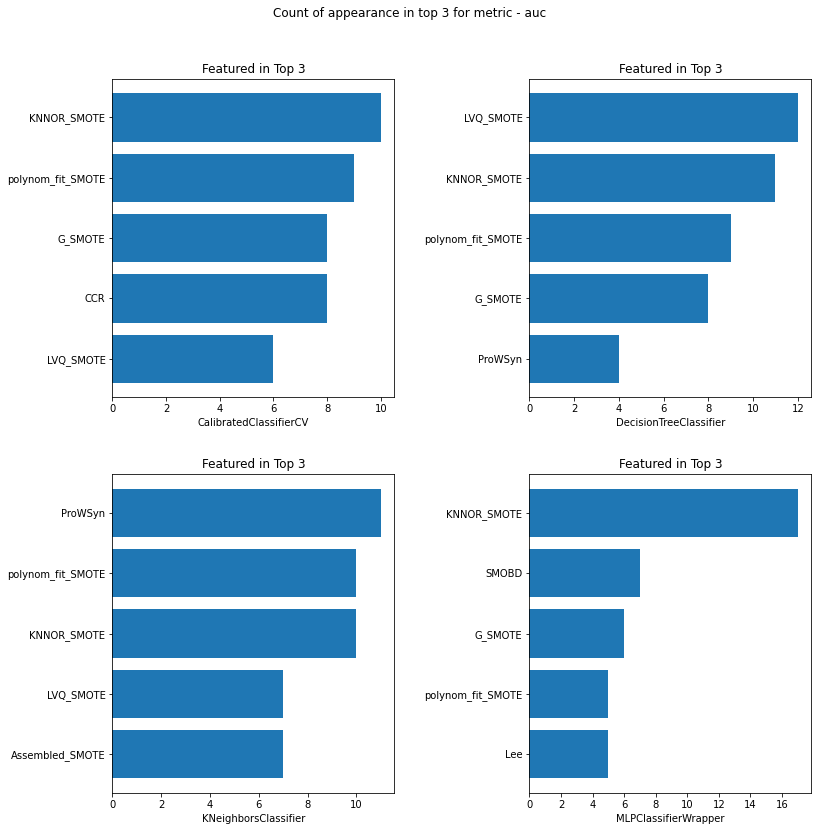

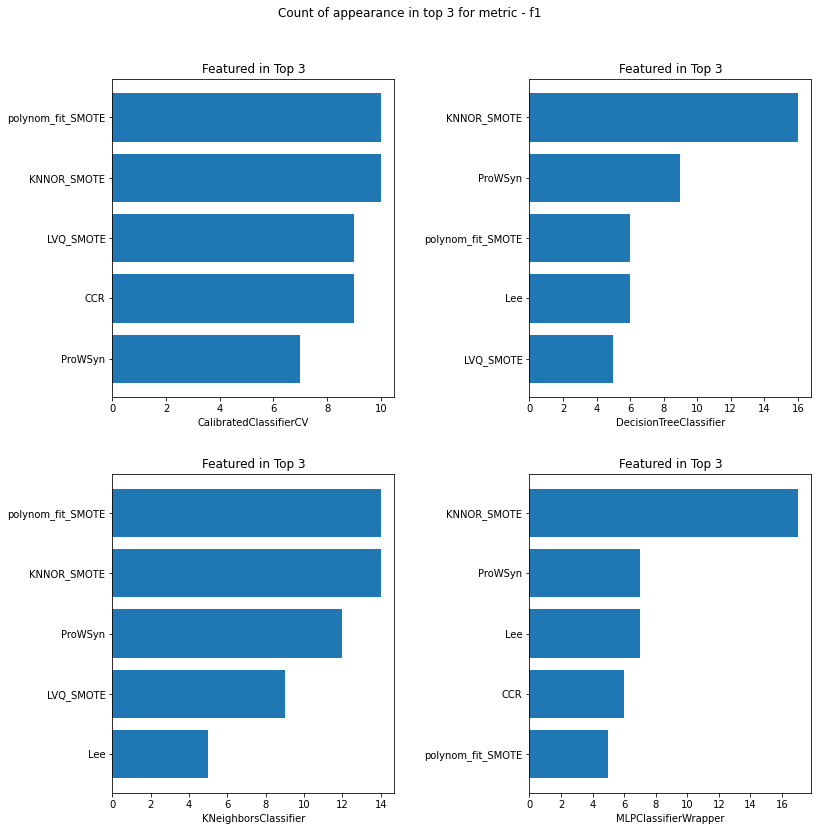

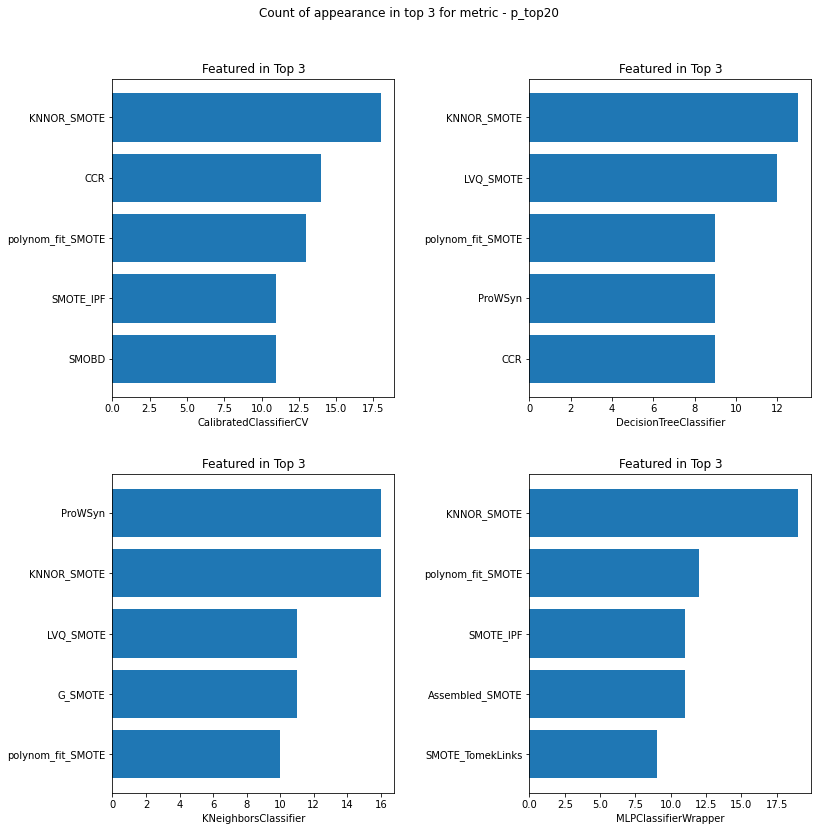

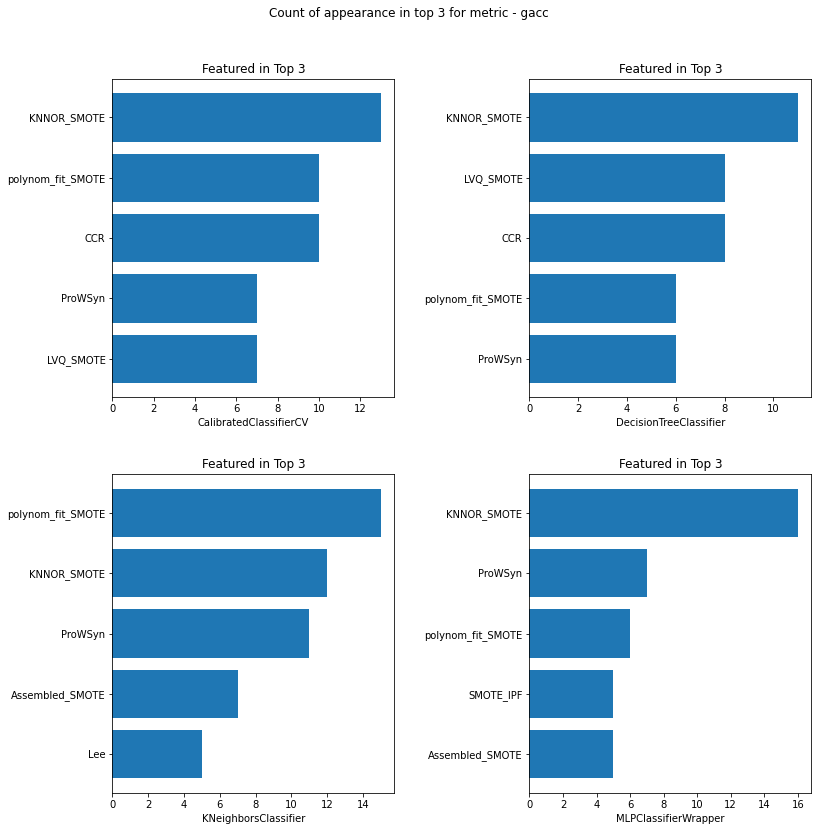

In [29]:
for metric in metrics:

#     print(metric)
    fig,axs=plt.subplots(2,2,figsize=(12,12))
    fig.suptitle('Count of appearance in top 3 for metric - '+str(metric))


    for u in range(2):
        for v in range(2):
            cl_no=u*2+v
            classifier=classifiers[cl_no]
        
#     for classifier in classifiers:            
#             print(classifier)
            top5_this_metric=[]
            for sampler in samplers:
    #             print(sampler,top5_dict[sampler][classifier][metric]["sum"])
                top5_this_metric.append(top5_dict[sampler][classifier][metric]["sum"])
            top_indices=np.argsort(top5_this_metric)
            top_indices=list(top_indices)
            top_indices.reverse()
#             print(top_indices)

            top5_samplers=[samplers[i] for i in top_indices[:5]]
            top5_values=[top5_this_metric[i] for i in top_indices[:5]]
#             for i in range(5):
#                 print(top5_samplers[i],top5_values[i])
#             print("####################")
            y_pos = np.arange(len(top5_values))
            axs[u,v].barh(y_pos, top5_values, align='center')
            axs[u,v].set_yticks(y_pos)
            axs[u,v].set_yticklabels(top5_samplers)
            axs[u,v].invert_yaxis()  # labels read top-to-bottom
            axs[u,v].set_xlabel(classifier)
            axs[u,v].set_title('Featured in Top 3')      
    fig.tight_layout(pad=3.0)
#     plt.savefig(os.path.join(cache_path,"Top 3_"+metric+".svg"))
#     plt.savefig(os.path.join(cache_path,"Top 3_"+metric+".jpg"))    
    plt.show()
    
    


In [30]:
top5_dict["KNNOR_SMOTE"]

{'CalibratedClassifierCV': {'auc': {'sum': 10},
  'f1': {'sum': 10},
  'p_top20': {'sum': 18},
  'gacc': {'sum': 13}},
 'DecisionTreeClassifier': {'auc': {'sum': 11},
  'f1': {'sum': 16},
  'p_top20': {'sum': 13},
  'gacc': {'sum': 11}},
 'KNeighborsClassifier': {'auc': {'sum': 10},
  'f1': {'sum': 14},
  'p_top20': {'sum': 16},
  'gacc': {'sum': 12}},
 'MLPClassifierWrapper': {'auc': {'sum': 17},
  'f1': {'sum': 17},
  'p_top20': {'sum': 19},
  'gacc': {'sum': 16}}}

### Following is to extract the top 5 oversamplers that were in top 3 consistently

In [31]:
great_dict

{'Assembled_SMOTE': {'CalibratedClassifierCV': {'auc': {1: 0,
    2: 1,
    3: 1,
    4: 3,
    5: 1,
    6: 4,
    7: 1,
    8: 2,
    9: 2,
    10: 3,
    11: 0,
    12: 1,
    13: 0},
   'f1': {1: 0,
    2: 0,
    3: 1,
    4: 3,
    5: 3,
    6: 1,
    7: 5,
    8: 1,
    9: 2,
    10: 3,
    11: 0,
    12: 0,
    13: 0},
   'p_top20': {1: 4,
    2: 3,
    3: 4,
    4: 3,
    5: 1,
    6: 2,
    7: 1,
    8: 0,
    9: 0,
    10: 1,
    11: 0,
    12: 0,
    13: 0},
   'gacc': {1: 0,
    2: 1,
    3: 1,
    4: 2,
    5: 4,
    6: 2,
    7: 2,
    8: 1,
    9: 1,
    10: 1,
    11: 2,
    12: 2,
    13: 0}},
  'DecisionTreeClassifier': {'auc': {1: 1,
    2: 2,
    3: 0,
    4: 0,
    5: 1,
    6: 3,
    7: 3,
    8: 3,
    9: 2,
    10: 3,
    11: 0,
    12: 1,
    13: 0},
   'f1': {1: 1,
    2: 1,
    3: 2,
    4: 4,
    5: 1,
    6: 1,
    7: 0,
    8: 1,
    9: 5,
    10: 1,
    11: 2,
    12: 0,
    13: 0},
   'p_top20': {1: 3,
    2: 1,
    3: 1,
    4: 2,
    5: 1,
    6: 3,
  

In [32]:
'''
samplers
classifiers
db_names
metrics
'''

'\nsamplers\nclassifiers\ndb_names\nmetrics\n'

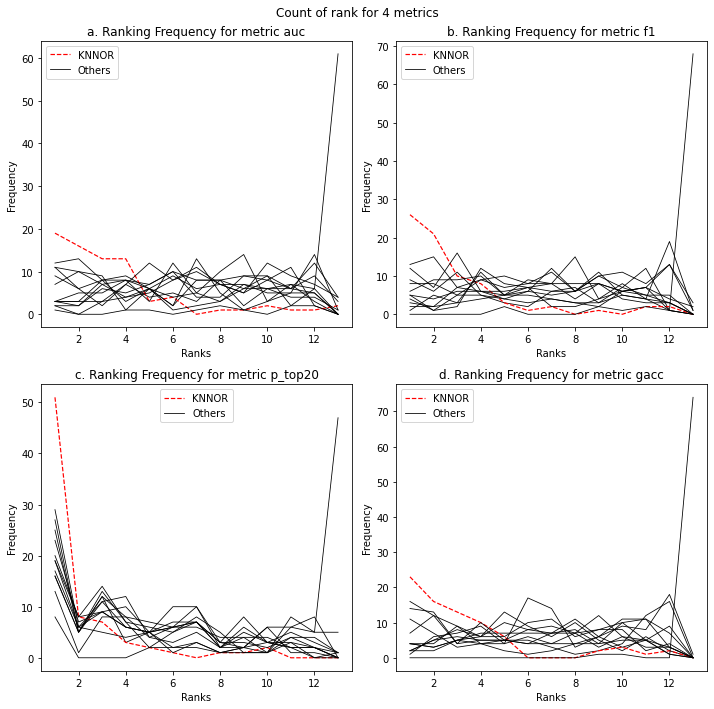

In [43]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Count of rank for 4 metrics')
# for metric in metrics:
img_labels=['a','b','c','d']
for u in range(2):
    for v in range(2):
        metric=metrics[u*2+v]
#         print(metric)
        for sampler in samplers:
#             print(sampler)    
            rank_counter=[0 for i in range(len(samplers)+1)]
            for classifier in classifiers:
#                 print(classifier)
                for rank in range(1,len(samplers)+1):
                    rank_counter[rank]+=great_dict[sampler][classifier][metric][rank]
#             print(rank_counter)
            x=[i for i in range(len(rank_counter))]
            if sampler == "KNNOR_SMOTE":
                axs[u,v].plot(x[1:],rank_counter[1:], color='red',linewidth=1.2,linestyle='--',label="KNNOR")
#                 axs[u,v].legend()
            elif sampler == "SMOTE":
                axs[u,v].plot(x[1:],rank_counter[1:], color='black',linewidth=0.8,label="Others")        
            else:
                axs[u,v].plot(x[1:],rank_counter[1:], color='black',linewidth=0.8)
            axs[u,v].set_xlabel("Ranks")
            axs[u,v].set_ylabel("Frequency")
            axs[u,v].set_title(img_labels[u*2+v]+'. Ranking Frequency for metric '+str(metric))
        axs[u,v].legend()

fig.tight_layout(pad=1.0)
plt.savefig(os.path.join(cache_path,"Running_All.svg"))
plt.savefig(os.path.join(cache_path,"Running_All.jpg"))    

plt.show()
    
    

### Bump chart or rank plot

In [34]:
# create a dataframe with ranks side to side
# sampler, rankset1, rankset2, rankset3, so on


In [35]:
df.head(15)

,db_name,classifier,sampler,auc,f1,p_top20,gacc,auc_rank,f1_rank,p_top20_rank,gacc_rank
0,glass1,CalibratedClassifierCV,Assembled_SMOTE,0.677557,0.581461,0.539062,0.633729,10.0,10.0,2.0,9.0
1,glass1,CalibratedClassifierCV,CCR,0.668118,0.571870,0.507812,0.619339,12.0,11.0,12.0,12.0
2,glass1,CalibratedClassifierCV,G_SMOTE,0.687728,0.589971,0.539062,0.650443,2.0,6.0,2.0,2.0
3,glass1,CalibratedClassifierCV,KNNOR_SMOTE,0.688702,0.602118,0.593750,0.650443,1.0,2.0,1.0,2.0
4,glass1,CalibratedClassifierCV,LVQ_SMOTE,0.675237,0.565035,0.531250,0.621141,11.0,12.0,6.0,11.0
5,glass1,CalibratedClassifierCV,Lee,0.683575,0.588745,0.531250,0.629165,4.0,7.0,6.0,10.0
6,glass1,CalibratedClassifierCV,NoSMOTE,0.628814,0.091954,0.445312,0.223522,13.0,13.0,13.0,13.0
7,glass1,CalibratedClassifierCV,ProWSyn,0.683872,0.606936,0.531250,0.641728,3.0,1.0,6.0,6.0
8,glass1,CalibratedClassifierCV,SMOBD,0.677610,0.600954,0.531250,0.637371,9.0,3.0,6.0,7.0
9,glass1,CalibratedClassifierCV,SMOTE,0.682325,0.590643,0.531250,0.658737,6.0,5.0,6.0,1.0


In [36]:
'''
samplers
classifiers
db_names
metrics
'''

'\nsamplers\nclassifiers\ndb_names\nmetrics\n'

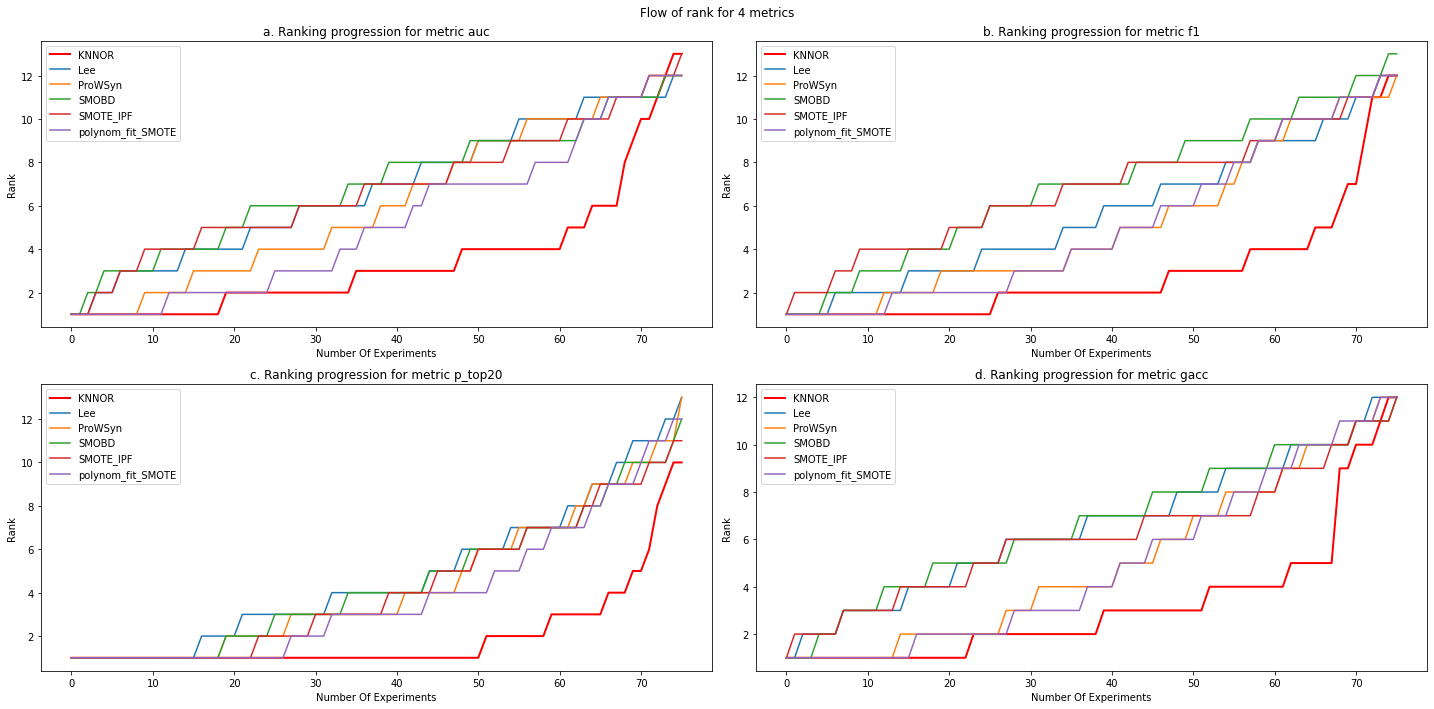

In [45]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Flow of rank for 4 metrics')
img_labels=['a','b','c','d']
# for metric in metrics:
for u in range(2):
    for v in range(2):
        metric=metrics[u*2+v]
        for sampler in samplers:
            local_df=df[df["sampler"]==sampler]
            ranks=list(local_df[metric+"_rank"])
            ranks.sort()
            x=[i for i in range(len(ranks))]
            if sampler == "KNNOR_SMOTE":
                axs[u,v].plot(x,ranks, color='red',linewidth=2,label="KNNOR")
            elif sampler in ['SMOTE_IPF','Lee','SMOBD','ProWSyn','polynom_fit_SMOTE']:
                axs[u,v].plot(x,ranks,linewidth=1.5,label=sampler)
            axs[u,v].set_xlabel("Number Of Experiments")
            axs[u,v].set_ylabel("Rank")
            axs[u,v].set_title(img_labels[u*2+v]+'. Ranking progression for metric '+str(metric))
        axs[u,v].legend()
fig.tight_layout(pad=1.0)
plt.savefig(os.path.join(cache_path,"Rank_progress_6.svg"))
plt.savefig(os.path.join(cache_path,"Rank_progress_6.jpg"))    

plt.show()
                 

In [38]:
great_dict

{'Assembled_SMOTE': {'CalibratedClassifierCV': {'auc': {1: 0,
    2: 1,
    3: 1,
    4: 3,
    5: 1,
    6: 4,
    7: 1,
    8: 2,
    9: 2,
    10: 3,
    11: 0,
    12: 1,
    13: 0},
   'f1': {1: 0,
    2: 0,
    3: 1,
    4: 3,
    5: 3,
    6: 1,
    7: 5,
    8: 1,
    9: 2,
    10: 3,
    11: 0,
    12: 0,
    13: 0},
   'p_top20': {1: 4,
    2: 3,
    3: 4,
    4: 3,
    5: 1,
    6: 2,
    7: 1,
    8: 0,
    9: 0,
    10: 1,
    11: 0,
    12: 0,
    13: 0},
   'gacc': {1: 0,
    2: 1,
    3: 1,
    4: 2,
    5: 4,
    6: 2,
    7: 2,
    8: 1,
    9: 1,
    10: 1,
    11: 2,
    12: 2,
    13: 0}},
  'DecisionTreeClassifier': {'auc': {1: 1,
    2: 2,
    3: 0,
    4: 0,
    5: 1,
    6: 3,
    7: 3,
    8: 3,
    9: 2,
    10: 3,
    11: 0,
    12: 1,
    13: 0},
   'f1': {1: 1,
    2: 1,
    3: 2,
    4: 4,
    5: 1,
    6: 1,
    7: 0,
    8: 1,
    9: 5,
    10: 1,
    11: 2,
    12: 0,
    13: 0},
   'p_top20': {1: 3,
    2: 1,
    3: 1,
    4: 2,
    5: 1,
    6: 3,
  

In [39]:
(0.6763+0.6993+0.7276+0.6774)/4

0.69515

In [40]:
9/4

2.25

In [ ]:
0